<a href="https://colab.research.google.com/github/Daniel-Karlik/Parliament_Spotlight_NLP/blob/dev_model/Parliament_Spotlight_TF_IDF_K_MEANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import glob
import re
import string

In [2]:
#from google.colab import auth
from google.colab import drive
#auth.authenticate_user()

In [3]:
drive.mount('/content/drive/')
# Path to our data on google drive
DATA_PATH = "/content/drive/MyDrive/NLP/"

Mounted at /content/drive/


In [4]:
# path_file = "C:/Users/Taymad/Downloads/psp_data_300.pickle" # not working, now I need to load psp_data_300.pkl manually into colab...

In [5]:
# psp_data = pickle.load(open('/content/drive/MyDrive/NLP/psp_data_300.pkl', 'rb'))

In [6]:
# type(psp_data)

pandas.core.frame.DataFrame

## Removing stopwords

In [7]:
# from gensim.utils import simple_preprocess

In [9]:
# with open('/content/drive/MyDrive/NLP/stopwords-cs.txt', 'r') as file:
#     my_stopwords=[file.read().split('\n')]

In [10]:
# from collections import Iterable
# def flatten(lis):
#      for item in lis:
#          if isinstance(item, Iterable) and not isinstance(item, str):
#              for x in flatten(item):
#                  yield x
#          else:        
#              yield item

# my_stopwords = list(flatten(my_stopwords))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  """Entry point for launching an IPython kernel.


In [11]:
# def remove_stopwords(texts):
#     return [[word for word in simple_preprocess(str(doc)) 
#              if word not in my_stopwords] for doc in texts]


# # remove stop words
# psp_data['text'] = remove_stopwords(psp_data['text'])

In [12]:
# print(len(psp_data['text']))

48949


In [13]:
# psp_data['text'] = psp_data['text'].apply(lambda x: " ".join(x))

In [26]:
# psp_data.to_pickle("./psp_data_300_no_stopwords.pickle")

## Now we can use TF-IDF

In [ ]:
psp_data = pickle.load(open('/content/drive/MyDrive/NLP/psp_data_300_no_stopwords.pickle', 'rb'))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
tfidf_vectorizer = TfidfVectorizer(input='content', max_features = 500, max_df = 0.7) # Hopefully stop_words will be filtered by TD-IDF mechanism

In [16]:
tfidf_vector = tfidf_vectorizer.fit_transform(psp_data['text']) # Run time 36s

In [17]:
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), columns=tfidf_vectorizer.get_feature_names_out()) # HERE IT CRASHES with too high max_features 

In [18]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()

### First glance at our featured words

In [19]:
print(tfidf_df)

                               bod         bodu    body        bychom  \
0                         0.000000     0.000000     0.0      0.015024   
1                         0.000000     0.000000     0.0      0.032251   
2                         0.000000     0.000000     0.0      0.000000   
3                         0.000000     0.000000     0.0      0.000000   
4                         0.000000     0.000000     0.0      0.027068   
...                            ...          ...     ...           ...   
48945                     0.000000     0.000000     0.0      0.000000   
48946                     0.000000     0.093591     0.0      0.000000   
48947                     0.000000     0.000000     0.0      0.000000   
48948                     0.042518     0.177093     0.0      0.000000   
00_Document Frequency  7571.000000  6726.000000  4054.0  15235.000000   

                           bydlení          byť        celou         celá  \
0                         0.088183     0.00000

### Now we remove this auxiliary row

In [20]:
tfidf_df = tfidf_df.drop('00_Document Frequency', errors='ignore')

In [21]:
tfidf_df.stack().reset_index()

,level_0,level_1,0
0,0,bod,0.000000
1,0,bodu,0.000000
2,0,body,0.000000
3,0,bychom,0.015024
4,0,bydlení,0.088183
...,...,...,...
24474495,48948,řízení,0.000000
24474496,48948,škol,0.000000
24474497,48948,školství,0.000000
24474498,48948,školy,0.000000


### We rename columns to be more understandables

In [22]:
tfidf_df = tfidf_df.stack().reset_index() # This is necessary for some reason

In [23]:
tfidf_df = tfidf_df.rename(columns={0:'tfidf', 'level_0': 'document_id','level_1': 'term'})

In [24]:
tfidf_df.sort_values(by=['document_id','tfidf'], ascending=[True,False]).groupby(['document_id']).head(10)

,document_id,term,tfidf
212,0,peníze,0.328713
394,0,vláda,0.214425
29,0,dokonce,0.195148
395,0,vládní,0.183322
306,0,rozpočet,0.180411
...,...,...,...
24474326,48948,sněmovna,0.193287
24474085,48948,komise,0.189868
24474490,48948,řádu,0.177146
24474001,48948,bodu,0.177093


## Results above seems promising

## TODOs: k-means clustering, finding optimal parameters, TOP N words around center

In [31]:
from sklearn.cluster import KMeans
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# tfidf_vector = tfidf_vectorizer.fit_transform(psp_data['text'])

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters
Fit 22 clusters
Fit 24 clusters
Fit 26 clusters
Fit 28 clusters
Fit 30 clusters
Fit 32 clusters
Fit 34 clusters
Fit 36 clusters
Fit 38 clusters
Fit 40 clusters
Fit 42 clusters
Fit 44 clusters
Fit 46 clusters
Fit 48 clusters
Fit 50 clusters


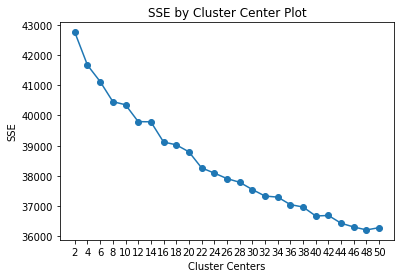

In [35]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tfidf_vector, 50)

In [38]:
clusters = MiniBatchKMeans(n_clusters=48, init_size=1024, batch_size=2048, random_state=20).fit_predict(tfidf_vector)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


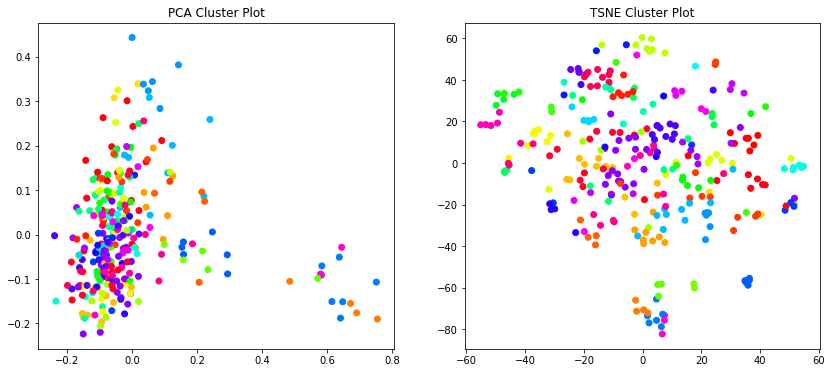

In [39]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(tfidf_vector, clusters)

In [40]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(tfidf_vector, clusters, tfidf_vectorizer.get_feature_names(), 5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
státy,republiky,české,unie,evropské

Cluster 1
miliardy,roce,rozpočtu,korun,milionů

Cluster 2
soud,soudu,práva,právní,řízení

Cluster 3
rady,sněmovny,výboru,poslanecké,usnesení

Cluster 4
návrh,zahajuji,číslo,bod,hlasování

Cluster 5
výboru,návrhu,návrhy,návrh,pozměňovací

Cluster 6
znamená,teď,té,těch,samozřejmě

Cluster 7
ustanovení,návrh,pozměňovací,slova,odst

Cluster 8
zařízení,péče,ministerstvo,zdravotní,zdravotnictví

Cluster 9
návrh,vlády,území,české,republiky

Cluster 10
snížení,návrh,příjmů,daní,daně

Cluster 11
dneska,těch,peníze,no,teď

Cluster 12
zahraniční,poslanec,zdravotní,pracovní,důvody

Cluster 13
číslo,sněmovny,bod,schůze,poslanec

Cluster 14
práce,návrh,fondu,sociální,bydlení

Cluster 15
ministerstvo,vzdělávání,školy,škol,školství

Cluster 16
služeb,kraje,služby,činnost,činnosti

Cluster 17
děti,školství,vzdělávání,škol,školy

Cluster 18
řízení,státního,státních,správy,státní

Cluster 19
roce,návrh,mil,korun,pojištění

Cluster 20
republiky,česká,republi

In [25]:
# tfidf_slice = tfidf_df[['government', 'borders', 'people', 'obama', 'war', 'honor','foreign', 'men', 'women', 'children']]
# tfidf_slice.sort_index().round(decimals=2)
